# Lab 9

In [127]:
from numpy import fft
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
from PIL import Image, ImageOps

## ANALIZA OBRAZÓW

In [174]:
def image_change(path, invert=True):
    img = Image.open(path) 
    gray = img.convert('L')
    if invert:
        gray = ImageOps.invert(gray)
    transformed = np.swapaxes(np.array(gray), 0, 1)
    return img, transformed

def plot_fig(img, title, size=(5,5)):
    # plt.figure(figsize=size)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()


def detect_match(img_path, pattern_path, prob=0.95, invert=True, all=True):
    #Wczytanie i dokonanie odwrócenia kolorów
    img, img_transformed = image_change(img_path, invert)
    pat, pat_transformed = image_change(pattern_path, invert)

    #Transformacja
    img_fft = np.fft.fft2(img_transformed)
    img_fft_shift_abs = np.abs(img_fft)

    #Wykresy
    if all:
        plot_fig(np.swapaxes(np.log(img_fft_shift_abs),0,1), 'Moduł')
        plot_fig(np.swapaxes(np.angle(img_fft),0,1), 'Faza')
    plot_fig(np.swapaxes(pat_transformed,0,1), 'Wzór')
    plot_fig(np.swapaxes(img_transformed,0,1),'Obraz')

    C = np.real(np.fft.ifft2(np.multiply(img_fft, np.fft.fft2(np.rot90(pat_transformed, 2), s=img.size))))

    C_min = np.max(C) * prob
    args = np.argwhere(C >= C_min)  

    for x,y in args:
        for w in [0, pat.size[0]-1]:
            for z in range(pat.size[1]):
                img.putpixel((x-w, y-z), (255,0,0))
        for h in [0, pat.size[1]-1]:
            for z in range(pat.size[0]):
                img.putpixel((x-z, y-h), (255,0,0))

    plot_fig(img, 'Znalezione powtórzenia', size=(10,10) )


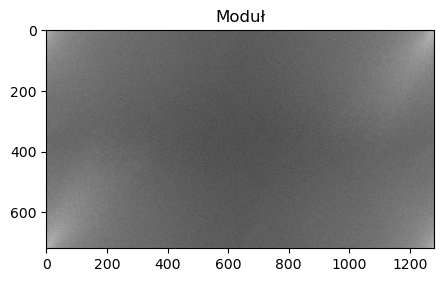

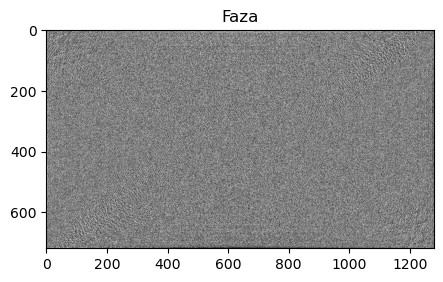

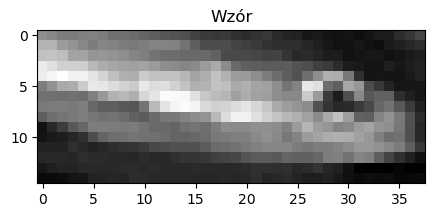

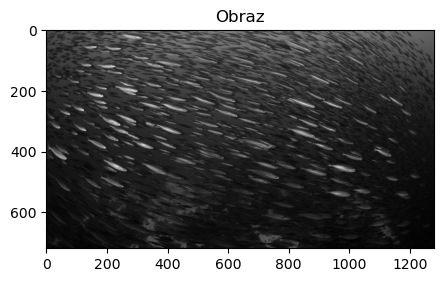

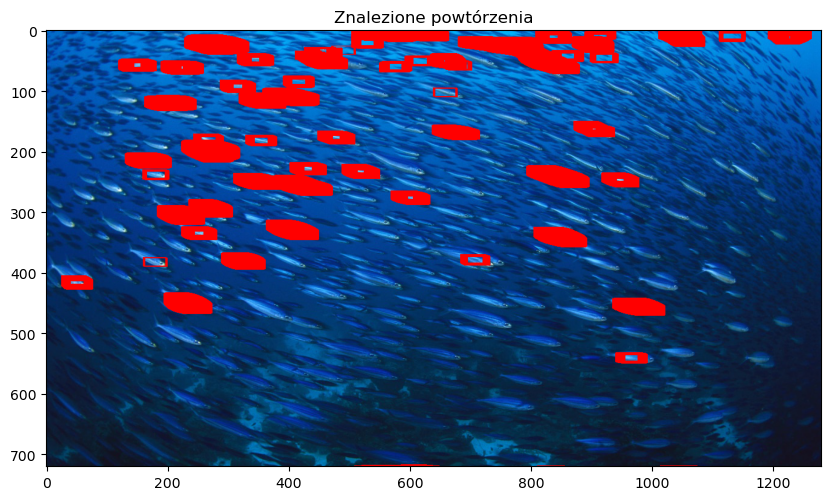

In [129]:
detect_match("school.jpg", "fish1.png", prob =0.65, invert=False)

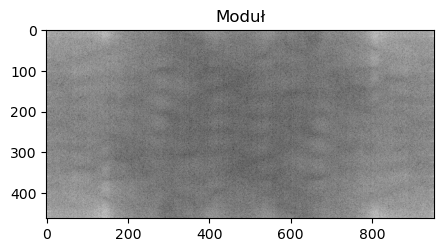

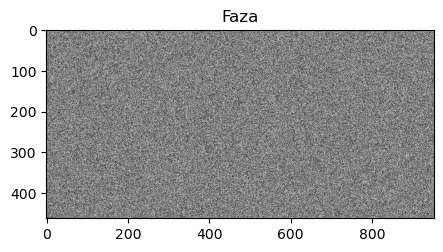

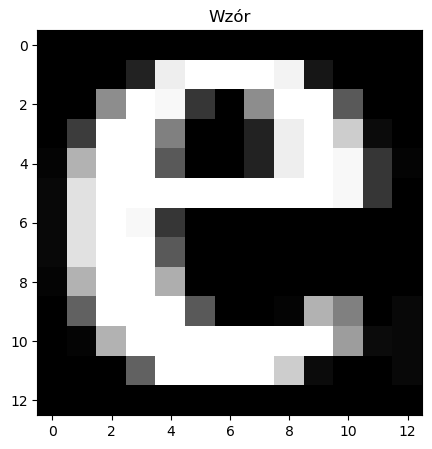

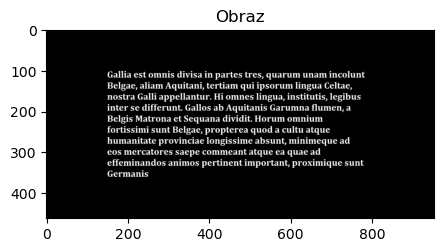

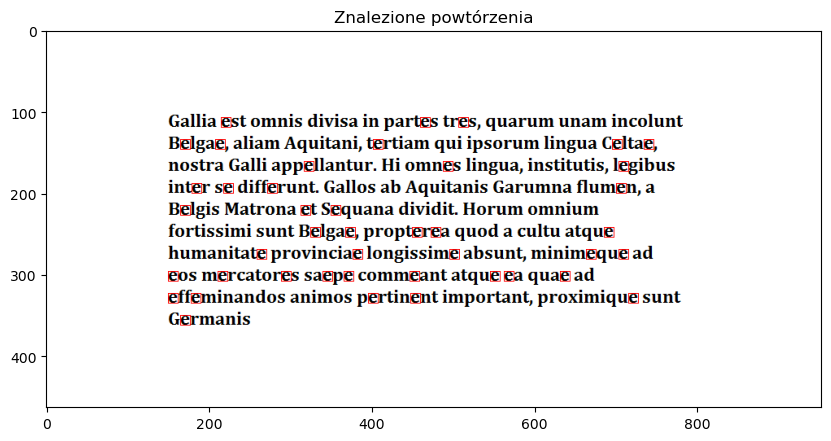

In [130]:
detect_match("galia.png", "galia_e.png")

## OCR

### Alice - serif font
### Lato - noserif font

In [132]:
from PIL import Image, ImageDraw, ImageFont

In [205]:
def create_alphabet_images(font_file_path, output_folder, font_size=12):
    alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
    extra = ".,?!"
    font = ImageFont.truetype(font_file_path, font_size)

    for letter in alphabet+extra:
        letter = letter.lower()
        image = Image.new("RGB", (font_size,int(font_size*3)), color="white")
        draw = ImageDraw.Draw(image)
        draw.text((0, 0), letter, font=font, fill="black")

        image_with_whitespace = Image.new("RGB", (font_size, font_size+7), color="white")
        image_with_whitespace.paste(image, (1, 1))

        if letter in extra:
            image_with_whitespace.save(f"{output_folder}/e{extra.index(letter)}.png")
        else:
            image_with_whitespace.save(f"{output_folder}/{letter}.png")

In [179]:
def create_text_images(font_file_path, output_folder, font_size=12):
    alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
    extra = ".,?!"
    all = alphabet.lower() + extra

    font = ImageFont.truetype(font_file_path, font_size)

    image = Image.new("RGB", (font_size, font_size*len(alphabet)*10), color="white")
    draw = ImageDraw.Draw(image)
    draw.text((0, 0), all, font=font, fill="black")

    image_with_whitespace = Image.new("RGB", (font_size, font_size+5), color="white")
    image_with_whitespace.paste(image, (2, 2))

    image_with_whitespace.save(f"{output_folder}.png")

In [206]:
create_alphabet_images("./fonts/Lato-Black.ttf", "./letters/lato")
create_alphabet_images("./fonts/Alice-Regular.ttf", "./letters/alice")
create_text_images("./fonts/Lato-Black.ttf", "./text/lato1")

In [165]:
ORDER = "ABDEFGHKMNPQRSTVWXYZO0CU123456789JIL".lower()

In [ ]:
def detect_match(img_path, pattern_path, prob=0.95, invert=True, all=True):
    #Wczytanie i dokonanie odwrócenia kolorów
    img, img_transformed = image_change(img_path, invert)
    pat, pat_transformed = image_change(pattern_path, invert)

    #Transformacja
    img_fft = np.fft.fft2(img_transformed)
    img_fft_shift_abs = np.abs(img_fft)

    #Wykresy
    if all:
        plot_fig(np.swapaxes(np.log(img_fft_shift_abs),0,1), 'Moduł')
        plot_fig(np.swapaxes(np.angle(img_fft),0,1), 'Faza')
    plot_fig(np.swapaxes(pat_transformed,0,1), 'Wzór')
    plot_fig(np.swapaxes(img_transformed,0,1),'Obraz')

    C = np.real(np.fft.ifft2(np.multiply(img_fft, np.fft.fft2(np.rot90(pat_transformed, 2), s=img.size))))

    C_min = np.max(C) * prob
    args = np.argwhere(C >= C_min)  

    for x,y in args:
        for w in [0, pat.size[0]-1]:
            for z in range(pat.size[1]):
                img.putpixel((x-w, y-z), (255,0,0))
        for h in [0, pat.size[1]-1]:
            for z in range(pat.size[0]):
                img.putpixel((x-z, y-h), (255,0,0))

    plot_fig(img, 'Znalezione powtórzenia', size=(10,10) )

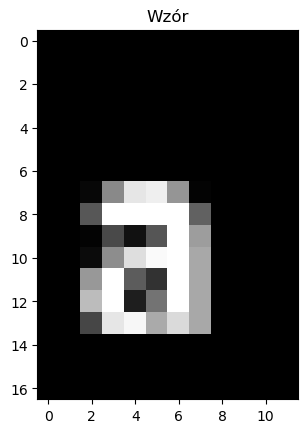

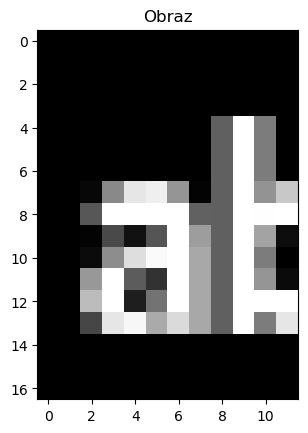

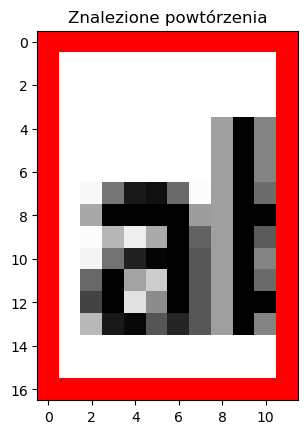

In [175]:
detect_match("./text/lato1.png","./letters/lato/A.png", all=False)